# 9.1 Regression - Model fitting

**Outline:**
* Bivariate data
* Least Squares Regression: Determining the slope of a line 
* Local Weighted Regression: Smooth curve fit
* Evaluating model fit

## Additional Assigned Reading

Data 8 textbook "Computational and Inferential Thinking: The Foundations of Data Science" By Ani Adhikari and John DeNero [Chapter 15 Prediction](https://www.inferentialthinking.com/chapters/15/Prediction.html). This should overlap with your assigned reading for Data 8.


## Bivariate data

_Bivariate data_ arise in any system where one quantity depends on another. For example: if you are measuring the distance between you (the origin) and an object moving away from you, and you make multiple measurements at different times. Then you have distance measured _as a funtion of_ time. There are many examples in Earth and Planetary Science where we are interested in the dependence of one set of data on another. We have dealt with such scenarios thus far in considering the distance of the last geomagnetic reversal from the ridge crest to get spreading rate and the difference in arrival times of the $P$ and $S$ seismic waves is related to distance from the source to the receiver. 

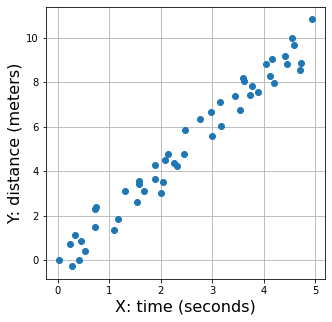

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# make up some randomly scattered linearly related data
x_value = np.random.uniform(0,5,50)
m_value = 2
b_value = np.random.uniform(-1,1,50)
y_value = m_value*x_value+b_value

# plot the data
plt.figure(1,(5,5)) 
plt.plot(x_value,y_value,'o')
plt.xlabel('X: time (seconds)', fontsize=16);
plt.ylabel('Y: distance (meters)', fontsize=16);
plt.grid()

## Linear Regression (Least Squares)

Continuing with our example of distance as a function of time, we have time on the x-axis in seconds and distance on the y-axis in meters. The slope of this line is then the velocity: 

$d = vt$

where $v$ is velocity, $d$ is distance, and $t$ is time. 

This looks a lot like the equation for a line through the data ($y=mx + b$) where $m$ is the slope and $b$ is the y-intercept.  In this case we'll say the object started at our location, so the y-intercept is 0, and $m$ is $v$.

So how do we find the slope?

**Watch this video about Least Squares Regression:**

[![](http://img.youtube.com/vi/tl5QNhSe0Yk/0.jpg)](http://www.youtube.com/watch?v=tl5QNhSe0Yk "")


Here is where we can use linear regression to find the "best fit" line through the data. The approach is to minimize the sum of the squares of the distances (residuals) between the points and a line through them. In this illustration below, the residuals are the vertical distance between each data point and the line:


![](./figures/Residuals_for_Linear_Regression_Fit.png)

The approach in linear regression is to find the line that minimizes the squared value of these distances all added up. 

![](./figures/RMSE1.png)
![](./figures/RMSE2.png)
![](./figures/RMSE3.png)
![](./figures/RMSE4.png)



### Fitting a line with `np.polyfit()`

We determine the best-fit line through this least squares approach using the ```np.polyfit()``` function. A straight line is a first degree polynomial.

`np.polyfit()` can be used to calculate best fit lines (setting the degree (```deg```) to 1), or higher order curves (setting degree to 2 or higher) returning the slope and the intercept.

In [2]:
m_b= np.polyfit(x_value,y_value,1)
print(m_b) #see if that worked

[ 2.07749266 -0.09606371]


`m_b`  is an array of coefficients, where the first is the slope and the second is the y-intercept.  

We can now use the function `np.polyval()` which will calculate new y values using the model of a linear fit. We can feed `m_b` into `np.polyval( )`, along with our x array to get a new set of y values which are the y values for the best-fit linear model. Then we can plot the model data as a black line along with the original data. 

In [3]:
model_y_values = np.polyval(m_b,x_value)
model_y_values

array([ 5.00236641,  3.09619568,  8.28523141,  4.0818072 , -0.07095681,
        8.48130546,  7.72223813,  0.47466627,  6.0708732 ,  3.165404  ,
        2.148038  ,  3.82977537,  8.53948335,  0.98675363,  9.1610139 ,
        7.25074882,  0.37218767,  9.69502007,  1.45103181,  7.96964459,
        7.67773716,  2.60570723,  3.83846163,  5.033843  ,  7.37568794,
        2.31866279,  7.0463177 , 10.17377053,  0.74791103,  9.42982167,
        9.35403226,  7.41477201,  4.21408052,  1.41616713,  6.46074596,
        3.17679649,  4.70436674,  1.38501102,  9.09127443,  4.60755996,
        4.1367105 ,  0.83126088,  6.12522192,  3.37280868,  9.73007607,
        0.57216753,  8.61467626,  4.36046017,  6.50625743,  5.62087381])

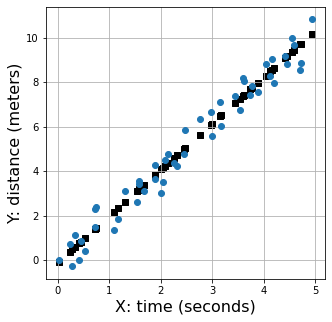

In [4]:
# plot the data and model
plt.figure(1,(5,5)) 
plt.plot(x_value,y_value,'o',label='Noisy observations')
plt.scatter(x_value,model_y_values,
         color='black',marker='s',label='Best fit to noisy data')
plt.xlabel('X: time (seconds)', fontsize=16);
plt.ylabel('Y: distance (meters)', fontsize=16);
plt.grid()

## Locally Weighted Regression

With some datasets it would be nice to be able to fit a smooth curve through the data, but not make a lot of assumptions about what the functional form of the data it. That is, it could be preferable not to assume that the data are going to be well-represented by a 1st or 2nd order polynomial. One approach that can be taken is to apply Locally Weighted Scatterplot Smoothing (LOWESS).

**Here is a slightly irritating, but informative video that explains locally-weighted regression.**

[![](http://img.youtube.com/vi/Vf7oJ6z2LCc/0.jpg)](http://www.youtube.com/watch?v=Vf7oJ6z2LCc "")


### Curve fitting a line with `nonparametric.lowess`

The example code below is slightly modified from the documentation of the Python module [statsmodel](https://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html)
In this code, noisy data associated with a sine curve are simulated. The ```nonparametric.lowess``` function is then applied to the data using two different fractions of the data (i.e. how much of the data is considered by the local weighting). The `frac` argument is the fraction of the data used when estimating each y-value, lowering it will result in a curvier model.

**Note that the ```lowess``` function returns a two column numpy array. The x-values are the first column and the y-values are the second column. They are accessed using the [:,0] notation that can be applied to numpy arrays.**

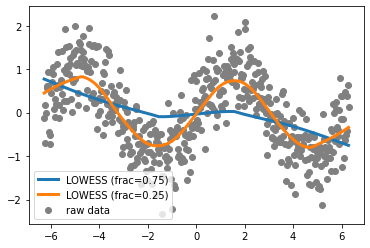

In [5]:
import statsmodels.api as sm

lowess = sm.nonparametric.lowess
x = np.linspace(-2*np.pi, 2*np.pi, 500)
y = np.sin(x) + np.random.normal(size=len(x))/2
z = lowess(y, x, frac=0.75)
w = lowess(y, x, frac=0.25)

plt.scatter(x,y,color='grey',label='raw data')
plt.plot(z[:,0],z[:,1],label='LOWESS (frac=0.75)',linewidth=3)
plt.plot(w[:,0],w[:,1],label='LOWESS (frac=0.25)',linewidth=3)
plt.legend()
plt.show()

## Evaluating model fit

### Pearson correlation coefficient R$^{2}$

We'd also like to know who well our linear model fits our data (i.e. how correlated the data are). We'll use the Pearson $R^{2}$ correlation coefficient for this. $R^{2}$ is zero for uncorrelated data, and 1 for perfectly linear data (so no misfit between the model line and data). We'll use the scipy function `stats.linregress` to compute $R^{2}$. 

And use it, to get what is normally called the $R^2$ value, which when 1. represents perfect agreement.

![](./figures/Correlation_examples.png)

> Pearson correlation coefficient between several example X,Y sets. Source: https://en.wikipedia.org/wiki/Correlation_and_dependence

In [6]:
from scipy.stats import stats

# compute the R^2 for the random linear distance per time linear example above
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_value,y_value)

rvalue**2

0.9668407878829977

Not a bad fit!  We can have confidence that there is a strong correlation between time and distance. The object has a constant velocity.

### Plotting Residuals

To see how well the regression performs, the data scientist must measure how far off the estimates are from the actual values. These differences are called *residuals*.

$$
\mbox{residual} ~=~ \mbox{observed value} ~-~ \mbox{regression estimate}
$$

A residual is what's left over – the residue – after estimation. 

Residuals are the vertical distances of the points from the regression line. There is one residual for each point in the scatter plot. The residual is the difference between the observed value of $y$ and the fitted value of $y$, so for the point $(x, y)$,

$$
\mbox{residual} ~~ = ~~ y ~-~
\mbox{fitted value of }y
~~ = ~~ y ~-~
\mbox{height of regression line at }x
$$

**The residual plot of a good regression shows no pattern. The residuals look about the same, above and below the horizontal line at 0, across the range of the predictor variable.**

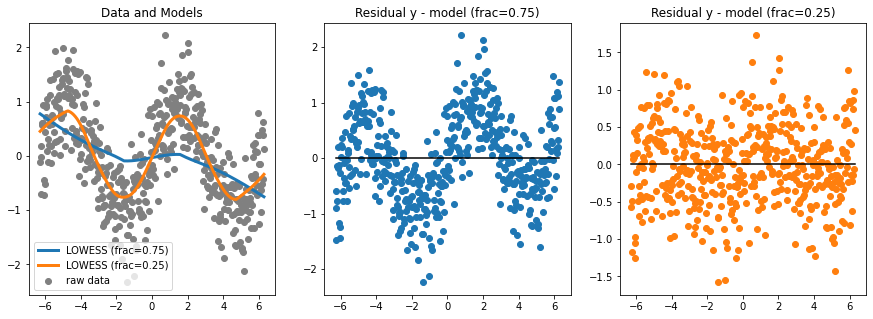

In [7]:
# compute residuals for the random sine example above
residual_frac75 = y - z[:,1]
residual_frac25 = y - w[:,1]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(x,y,color='grey',label='raw data')
axs[0].plot(z[:,0],z[:,1],label='LOWESS (frac=0.75)',linewidth=3)
axs[0].plot(w[:,0],w[:,1],label='LOWESS (frac=0.25)',linewidth=3)
axs[0].legend()
axs[0].set_title('Data and Models')
axs[1].scatter(z[:,0],residual_frac75,label='y - model (frac=0.75)',color='#1f77b4')
axs[1].plot([-2*np.pi, 2*np.pi],[0, 0],color='black')
axs[1].set_title('Residual y - model (frac=0.75)')
axs[2].scatter(w[:,0],residual_frac25,label='y - model (frac=0.25)',color='#ff7f0e')
axs[2].plot([-2*np.pi, 2*np.pi],[0, 0],color='black')
axs[2].set_title('Residual y - model (frac=0.25)')
plt.show()